<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_SEAT/blob/main/gg_21_MNIST_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST 데이터셋과 tensorflow 라이브러리 불러오기
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

In [2]:
# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


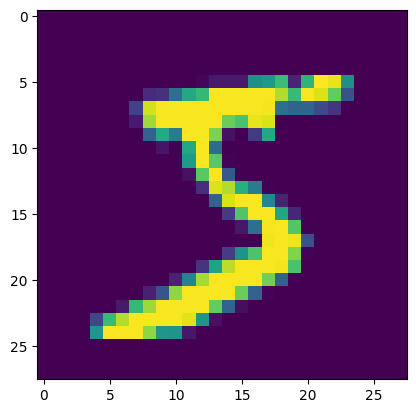

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [6]:
y_train = to_categorical(y_train, number_of_classes)
# 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [8]:
model = Sequential()  # 모델 선언
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

In [9]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [10]:
model.summary()  # 간단하게 요약해 출력

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2825 - acc: 0.9205 - val_loss: 0.1525 - val_acc: 0.9563
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1278 - acc: 0.9622 - val_loss: 0.1220 - val_acc: 0.9641
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0888 - acc: 0.9737 - val_loss: 0.0987 - val_acc: 0.9704
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0654 - acc: 0.9800 - val_loss: 0.0845 - val_acc: 0.9745
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0502 - acc: 0.9851 - val_loss: 0.0817 - val_acc: 0.9751
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0380 - acc: 0.9883 - val_loss: 0.0893 - val_acc: 0.9736
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0836 - val_acc: 0.9762
Epoch 8/10
1500/1500 [==============================] - 6s 4ms

In [12]:
# 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

손실률: 0.08233468979597092
정확도: 0.9760000109672546


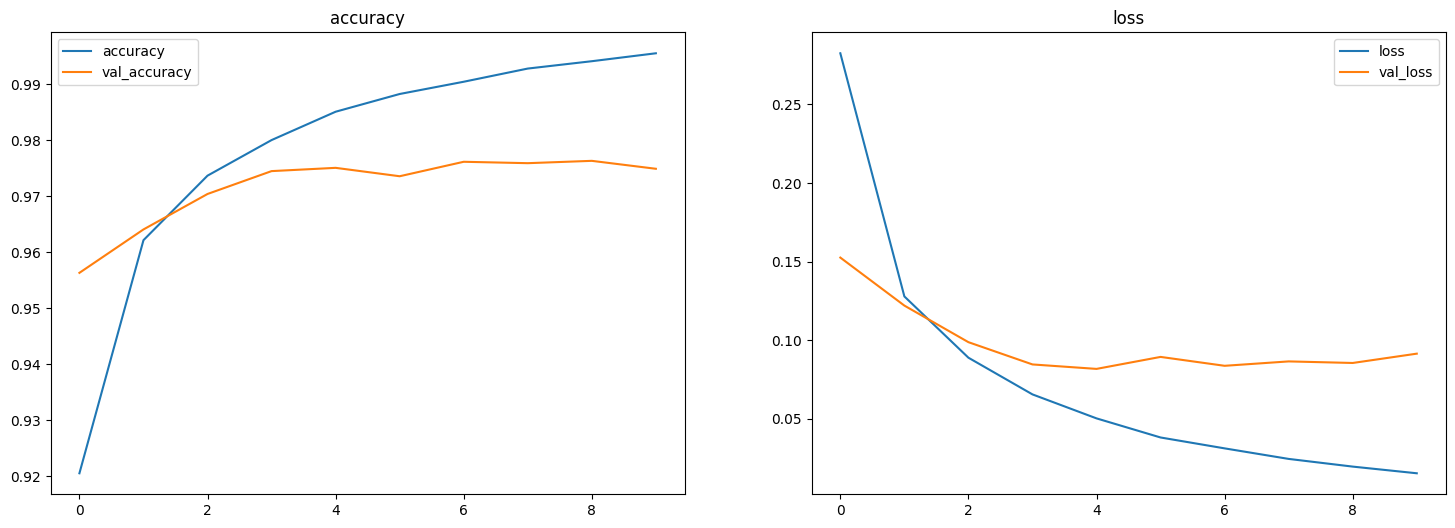

In [13]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [14]:
# 모델 저장
model.save('/content/model.h5')
loaded_model = load_model('/content/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


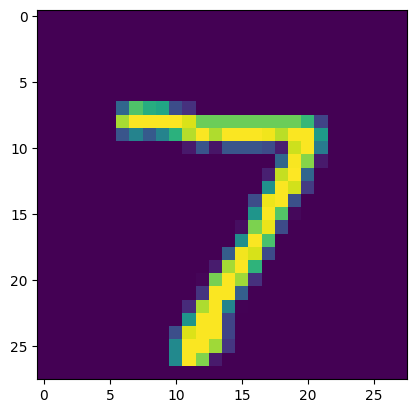

In [15]:
# 모델 테스트
plt.imshow(X_test[0].reshape(28, 28))
plt.show()

In [16]:
pred = model.predict(X_test[:1])[0]

print("real:", y_test[0].argmax())  # 7
print("predict:", pred.argmax())  # 7

1/1 [==============================] - 0s 75ms/step
real: 7
predict: 7
